In [58]:
server1_log = open("./logs/log_files/access.log", 'rt')

file_lines = server1_log.readlines()

click_cnt = 0

dates, times, ips, http_reqs = [], [], [], []

for i, line in enumerate(file_lines):
    
    year, month, extra, http_req = line.split("-")
    
    if "200" not in http_req.strip().split(" ")[-2]:
        continue    
    
    date = year+"-"+month+"-"+extra.split(" ")[0]
    
    time = extra.split(" ")[1]
    
    ip = extra.split(" ")[5].split(":")[0]
    
    http_req = http_req.split("\"")[1].split(" ")[1]
    
    dates.append(date)
    times.append(time)
    ips.append(ip)
    http_reqs.append(http_req)
    
    
server1_log.close()

In [59]:
server2_log = open("./logs/server2_log_files/access.log", 'rt')

file_lines = server2_log.readlines()

click_cnt = 0

for i, line in enumerate(file_lines):
    
    try: 
        year, month, extra, http_req = line.split("-")
    except:
        continue
    
    if "200" not in http_req.strip().split(" ")[-2]:
        continue    
    
    date = year+"-"+month+"-"+extra.split(" ")[0]
    
    time = extra.split(" ")[1]
    
    ip = extra.split(" ")[5].split(":")[0]
    
    http_req = http_req.split("\"")[1].split(" ")[1]
    
    dates.append(date)
    times.append(time)
    ips.append(ip)
    http_reqs.append(http_req)
    
server2_log.close()

In [60]:
import pandas as pd

log_df = pd.DataFrame()

log_df["date"] = dates
log_df["time"] = times
log_df['ip'] = ips
log_df["http_req"] = http_reqs

### 01 총 트래픽 중 "투자하기" 클릭률

In [83]:
log_df['simple_req'] = log_df['http_req'].apply(lambda x: x.split("?")[0])

<Axes: xlabel='date'>

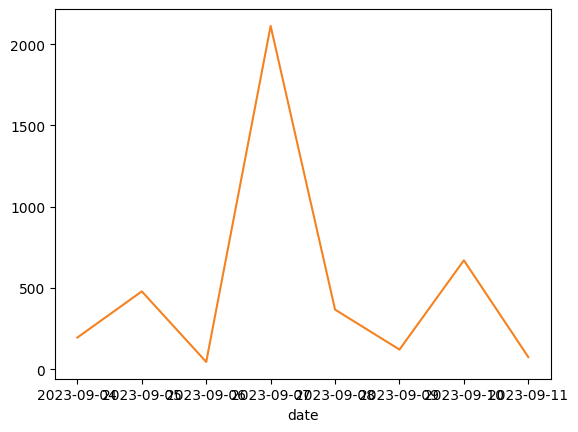

In [139]:
log_df.date.value_counts().sort_index().plot(color="#f58220")

In [89]:
import plotly.express as px

fig = px.pie(log_df, names="simple_req", title=f"총 클릭수 : {log_df.shape[0]}, 투자하기 클릭수: {log_df[log_df['simple_req'].str.contains('click')].shape[0] }")

fig.show()

In [102]:
ips = []
is_invest = []
is_info = []

for ip, df in log_df.groupby('ip'):
    
    ips.append(ip)
    
    if "/click_invest" in df.simple_req.to_list():
        is_invest.append(True)
    else:
        is_invest.append(False)
        
    if "/dist_methology" in df.simple_req.to_list():
        is_info.append(True)
    else:
        is_info.append(False)

### 02 정보제공 페이지와 "투자히기" 클릭률 상관관계 분석

In [103]:
my_df = pd.DataFrame()

my_df["ip"] = ips

my_df["is_invest"] = is_invest

my_df["is_info"] = is_info

In [125]:
from scipy.stats import pearsonr

pearsonr(my_df.is_info, my_df.is_invest)

PearsonRResult(statistic=0.19463723362819071, pvalue=9.48964426372075e-05)

- p-value가 0.05 이하이므로 "[대립가설] 두 변수간의 양의 상관관계(0.2)가 존재한다."를 채택할 수 있습니다.

In [131]:
info_click = my_df[my_df['is_info']]

fig = px.pie(info_click, names="is_invest", title="정보제공 페이지를 누른 사람들의 '투자하기' 클릭률")

fig.show()

In [132]:
not_info_click = my_df[~my_df['is_info']]

fig = px.pie(not_info_click, names="is_invest", title="정보제공 페이지를 누르지 않은 사람들의 '투자하기' 클릭률")

fig.show()

In [149]:
fig = px.scatter(my_df[["is_info", "is_invest"]],
           template="simple_white",
           title="정보제공페이지 클릭 여부와 투자하기 클릭 여부 산점도")

fig.data[0]['marker']['color'] = "#f58220"
fig.data[1]['marker']['color'] = "#a3a3a3"

fig.show()

'#1F77B4'